<img src="img/logo.jpg" alt="header" style="height:200px;">
<h1><center>Practica 3 Image Algebra</center></h1>
<h3><b>Alumno:</b> Mothelet Delgado Izaird Alexander</h3>
<h3><b>Boleta:</b> 2012010743</h3>
<h3><b>Grupo:</b> 3CV7</h3>
<h2><center><b>Introducción</b></center></h2>
<h3><b>Suma</b></h3>
<p align="justify">En su forma más sencilla, la operación suma toma como entrada dos imágenes de tamaño idéntico (no necesariamente) y produce como salida una tercera imagen del mismo tamaño de las primeras dos, en la cual cada valor de píxel es la suma de los valores de los píxel correspondientes de cada una de las dos imágenes de entrada.</p>

<p  align="justify">La adición de dos imágenes se lleva en un único paso. Los valores de los píxel del resultado vienen dados por: </p>
<img src="img/add_01.png">
<p align="justify">O si solamente se desea adicionar un valor constante C a una imagen, entonces:</p>
<img src="img/add_02.png">
<p align="justify">Si los valores de los píxel en las imágenes de entrada son realmente vectores en lugar de valores escalares (por ejemplo, imágenes a color) entonces los componentes individuales (componentes rojo, azul y verde) se adicionan separadamente para producir el valor de salida. </p>
<p align="justify">Si el formato de la imagen que se esta utilizando soporta únicamente valores de píxel enteros de 8 bits, es bastante probable que el resultado de la adición sea mayor que el máximo permitido por el valor del píxel. El efecto de ello, dependerá de la implementación. Los valores de píxel desbordados, deben tratarse de tal forma que se correspondan con los máximos valores permitidos. Si el formato de la imagen soporta valores con un rango de valores mucho más grande, por ejemplo un entero de 32 bits o números de puntos flotantes, este problema no tiene tanta ocurrencia. </p>



<h3><b>Resta</b></h3>
<p align="justify">En su forma más sencilla, la operación resta toma como entrada dos imágenes y produce como salida una tercera imagen en la cual cada valor de píxel es la resta de los valores de los píxel de la primera imagen menos sus correspondientes de la segunda imagen. Una variante común permite simplemente una constante especificada ser sustraída a cada píxel. Existen versiones que solamente producen la diferencia absoluta entre valores de píxel, en lugar de una salida asignada.</p>

<p  align="justify">La sustracción de dos imágenes se lleva a cabo en un único paso. Los valores de los píxel del resultado vienen dados por: </p>
<img src="img/sub_01.png">
<p align="justify">O si la operación únicamente calcula las diferencias absolutas entre las dos imágenes de entrada:</p>
<img src="img/sub_02.png">
<p align="justify">O si solamente se desea sustraer un valor constante C a una imagen simple, entonces: </p>
<img src="img/sub_03.png">


<p align="justify">Si los valores de los píxel en las imágenes de entrada son realmente vectores en lugar de valores escalares (por ejemplo, imágenes a color) entonces los componentes individuales (componentes rojo, azul y verde) se sustraen separadamente para producir el valor de salida. </p>
<p align="justify">Diversas implementaciones de la operación varían respecto de lo que hacen si los valores del píxel de salida son negativos. Algunos trabajan con formatos de imagen que soportan píxeles con valores negativos, en cuyo caso la forma en que se desplegaran dependerá del mapa de colores. Si el formato de la imagen no soporta valores negativos, a menudo tales píxeles se ajustan a cero, con lo cual se tiene una imagen típicamente negra.</p>
<p align="justify">Diversas implementaciones de la operación varían respecto de lo que hacen si los valoreSi la operación calcula las diferencias absolutas y las dos imágenes de entrada utilizan el mismo tipo de valor de píxel, es imposible entonces que los valores del píxel de salida estén fuera de rango, respecto al tipo de píxel de entrada.</p>



<h3><b>Multiplicación</b></h3>
<p align="justify">Como sucede con otras operaciones aritméticas, la multiplicación presenta dos formas principales. La primera forma toma dos imágenes de entrada y produce una imagen de salida en la cual los valores de los píxeles son solo aquellos de la primera imagen multiplicados por los valores correspondientes en la segunda imagen. La segunda forma toma una única imagen de entrada y produce un resultado en el cual cada valor de píxel es multiplicado por una constante, la cual debe ser especificada. Esta última forma es probablemente la más ampliamente utilizada, en un proceso conocido como escalado. (Este escalado en nivel de grises, no debe confundirse con el escalado geométrico).</p>

<p  align="justify">La multiplicación de dos imágenes se desarrolla de la siguiente forma: </p>
<img src="img/mul_01.png">
<p align="justify">Luego, el escalado por una constante sigue la siguiente formulación matemática:</p>
<img src="img/mul_02.png">

<p align="justify">La constante en este caso, es a menudo un punto flotante, y puede ser menor que uno, en cuyo caso se reducirá la intensidad de la imagen. Este puede incluso ser negativo si el formato de la imagen lo soporta. </p>
<p align="justify">Si los valores de píxel en las imágenes de entrada son realmente vectores en lugar de valores escalares (por ejemplo, imágenes a color) entonces los componentes individuales (componentes rojo, azul y verde) se multiplican separadamente para producir el valor de salida. </p>
<p align="justify">Si los valores calculados son mas grandes que el máximo permitido por el valor del píxel, entonces deben ser truncados al máximo valor.</p>

In [17]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import io, color
from skimage import exposure
import pylab

%matplotlib inline
pic1=Image.open("img/pic_01.png").convert("L") #Open the image and convert to gray scale 
pic2=Image.open("img/pic_02.png").convert("L") #Open the image and convert to gray scale 
pic_arr1 = np.asarray(pic1,np.uint) #converts the image to an Numpy Array
pic_arr2 = np.asarray(pic2,np.uint) #converts the image to an Numpy Array

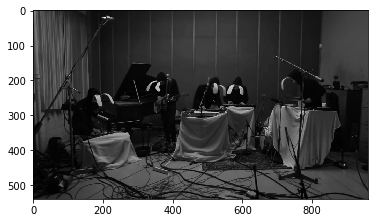

In [2]:
plt.imshow(pic_arr1,cmap=plt.cm.gray)


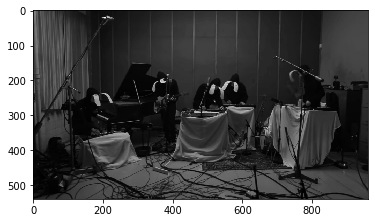

In [3]:
plt.imshow(pic_arr2,cmap=plt.cm.gray)

In [20]:
def addImageToImage(pic1,pic2):
    height =pic1.shape[0]
    width = pic1.shape[1]
    res_pic = np.ones([height, width],np.uint)
    for i in range(0,height):
        for j in range(0,width):
            res_pic[i][j]=pic1[i][j]+ pic2[i][j]
            if(res_pic[i][j]>255):
                res_pic[i][j] = 255
    return res_pic

def subImageToImage(pic1,pic2):
    height =pic1.shape[0]
    width = pic1.shape[1]
    res_pic = np.ones([height, width],np.uint)
    for i in range(0,height):
        for j in range(0,width):
            res_pic[i][j]=(pic1[i][j] - pic2[i][j])
            if(res_pic[i][j]>255):
                res_pic[i][j] = 255
            elif(res_pic[i][j]<0):
                res_pic[i][j] = 0
    return res_pic

def mulImage(pic1,number):
    height =pic1.shape[0]
    width = pic1.shape[1]
    res_pic = np.ones([height, width],np.uint)
    for i in range(0,height):
        for j in range(0,width):
            res_pic[i][j]=pic1[i][j] * number
            if(res_pic[i][j]>255):
                res_pic[i][j] = 255
    return res_pic

def convolve2d(image, mask): 
    mask = np.flipud(np.fliplr(mask))    # Flip the mask
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the mask and the image
            output[y,x]=(mask*image_padded[y:y+3,x:x+3]).sum()        
    return output

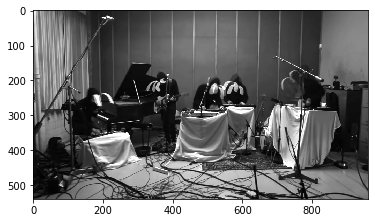

In [5]:
add_image = addImageToImage(pic_arr1,pic_arr2)
plt.imshow(add_image,cmap=plt.cm.gray)

/home/izaird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ulong_scalars


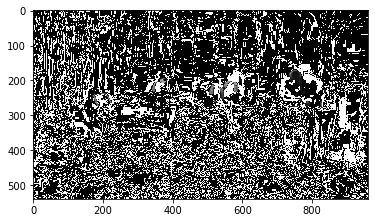

In [16]:
sub_image = subImageToImage(pic_arr2,pic_arr1)
plt.imshow(sub_image,cmap=plt.cm.gray)

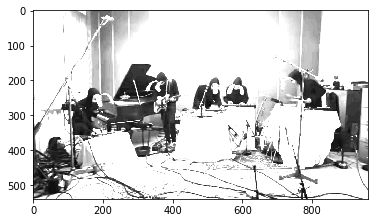

In [15]:
add_image = mulImage(pic_arr1,8)
plt.imshow(add_image,cmap=plt.cm.gray)

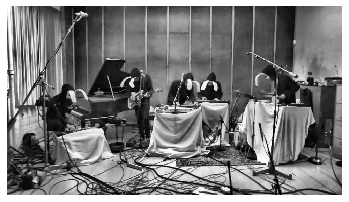

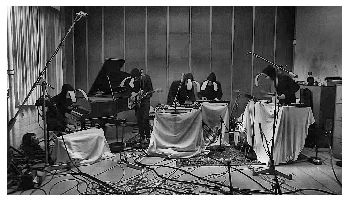

In [28]:
img = io.imread('img/pic_01.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# Adjust the contrast of the image by applying Histogram Equalization 
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
# Convolve the sharpen mask and the image
mask = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img,mask)
# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

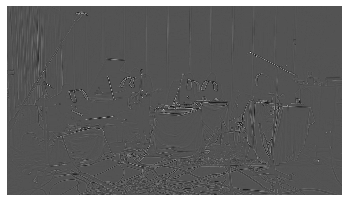

In [29]:
mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge_detection =   convolve2d(img,mask)
plt.imshow(edge_detection, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [30]:
def unionImg(img1,img2):
    img_res = img1 | img2
    return img_res
    
def intersectionImg(img1,img2):
    img_res = img1 & img2
    return img_res
    
def complementImg(img1,img2):
    img_res = img1 - img2
    return img_res

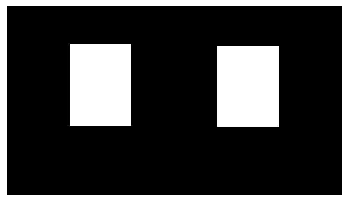

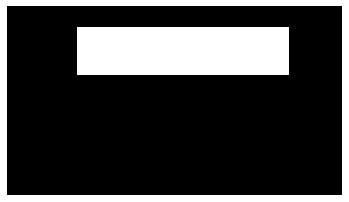

In [40]:
bin1=Image.open("img/bin1.jpg") #Open the image and convert to gray scale 
bin2=Image.open("img/bin2.jpg") #Open the image and convert to gray scale 
bin_arr1 = np.asarray(bin1,np.uint) #converts the image to an Numpy Array
bin_arr2 = np.asarray(bin2,np.uint) #converts the image to an Numpy Array

plt.imshow(bin_arr1,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(bin_arr2,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

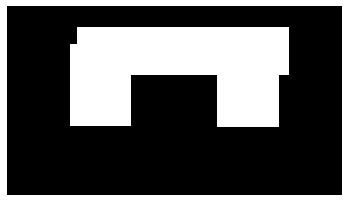

In [41]:
bin_res = unionImg(bin_arr1,bin_arr2)
plt.imshow(bin_res,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

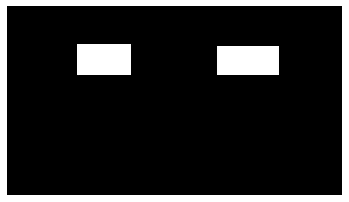

In [42]:
bin_res = intersectionImg(bin_arr1,bin_arr2)
plt.imshow(bin_res,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


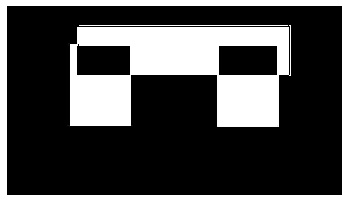

In [43]:
bin_res = complementImg(bin_arr1,bin_arr2)
plt.imshow(bin_res,cmap=plt.cm.gray)
plt.axis('off')
plt.show()